In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

## י 📌 $Boosting$ – שיפור מודלים בעזרת למידה הדרגתית י  

### י **📌 מבוא** י  
י $Boosting$ היא טכניקה מתקדמת בלמידת מכונה **שמשפרת מודלים על ידי למידה הדרגתית ($Sequential$ $Learning$)**. י  

🔹 בניגוד ל-$Bagging$ ול-$Random$ $Forests$ שבהם כל העצים נבנים **במקביל** וללא תלות זה בזה, ב-$Boosting$ **העצים נבנים אחד אחרי השני**, כך שכל עץ חדש **משפר את הטעויות של העץ הקודם**. י  

📌 **המטרה:** י  
י ליצור מודל חזק ומדויק יותר על ידי **התמקדות באזורים בהם המודל הקודם לא הצליח**. י  

📌 **למה $Boosting$ יעיל?** י  
- מאפשר למידה הדרגתית שמתמקדת באזורים קשים. י  
- מתאים במיוחד לבעיות **סיווג ($Classification$)** ו-**רגרסיה ($Regression$)**. י  
- לרוב משיג **דיוק גבוה יותר** לעומת שיטות אחרות ($Bagging$, $Random$ $Forests$). י  

---

## י **📌 כיצד עובד $Boosting$?** י  

י $Boosting$ פועל על פי הרעיון של **התאמת עצים לרזידואלים ($Residuals$)**: י  

🔹 **שלבים מרכזיים:** י  
1. מתחילים ממודל ראשוני (למשל, ממוצע התצפיות). י  
2. מחזים את השאריות ($Residuals$) של המודל הקיים. י  
3. מתאימים עץ חדש לחיזוי הרזידואלים. י  
4. מוסיפים את העץ החדש למודל הכולל **במשקל קטן \( \lambda \) ($"האטה"$)**. י  
5. חוזרים על התהליך מספר פעמים עד שמתקבל שיפור מספק. י  

📌 **המטרה היא לשפר בהדרגה את התחזיות, תוך התמקדות בטעויות שנעשו בשלבים קודמים.** י  

📌 **מדוע $Boosting$ עובד טוב?** י  
- עץ חדש כל פעם לומד **לתקן את הטעויות** של העצים הקודמים. י  
- משקל **נמוך** לכל עץ חדש מאפשר למודל להיות יציב יותר ולמנוע **$Overfitting$**. י  

---

## י **📌 ההבדל בין $Boosting$ לשיטות אחרות** י  

| **שיטה** | **אופן בניית העצים** | **מה משפרים?** |  
|----------|--------------------|----------------|  
| **$Bagging$** | בונים עצים במקביל | ממוצעים תחזיות כדי להקטין שונות |  
| **$Random$ $Forests$** | בונים עצים במקביל עם בחירת משתנים אקראיים | מקטינים קורלציה בין עצים |  
| **$Boosting$** | בונים עצים באופן הדרגתי | משפרים טעויות מהמודל הקודם |  

📌 **$Boosting$ אינו רק ממוצע של עצים, אלא משתמש בעצים קטנים ומוסיפים אותם בהדרגה כדי למקסם ביצועים.** י  

---

## י **📌 פרמטרים חשובים ב-$Boosting$** י  

י $Boosting$ נשלט על ידי מספר פרמטרים קריטיים: י  
- **מספר האיטרציות ($Number$ $of$ $Trees$)** – קובע כמה עצים ייבנו (יותר מדי עלול לגרום ל-$Overfitting$). י  
- **קצב הלמידה ($Learning$ $Rate$ \( \lambda \))** – קובע כמה משקל לתת לכל עץ חדש (ערכים נמוכים = יציבות גבוהה יותר). י  
- **עומק העצים ($Tree$ $Depth$)** – קובע כמה רמות יהיו לכל עץ (עצים עמוקים = למידה מורכבת יותר). י  
- **גודל הדגימה ($Subsample$ $Ratio$)** – קובע את אחוז הדאטה שמשתמשים בו בכל איטרציה (משפיע על הכללת המודל). י  
- **סוג פונקציית ההפסד ($Loss$ $Function$)** – משפיע על התאמת המודל ($Squared$ $Error$ לרגרסיה, $Log$ $Loss$ לסיווג). י  

---

## י **📌 דוגמה ידנית ל-$Boosting$** י  


In [16]:
# נתונים ראשוניים
houses = ['A', 'B', 'C', 'D', 'E']
sizes = np.array([50, 60, 70, 80, 90])
true_prices = np.array([200, 250, 300, 350, 400])

# שלב 1: ניבוי ראשוני (ממוצע)
avg_price = np.mean(true_prices)
initial_predictions = np.full_like(true_prices, avg_price)
residuals = true_prices - initial_predictions



# הצגת תוצאה 
df_results = pd.DataFrame({
    'House': houses,
    'Size': sizes,
    'True Price': true_prices,
    'Final Prediction': initial_predictions,
    'Final Residual': residuals
})
# הדפסת התוצאות
print(df_results)

# הצגת הנתונים כטבלה אם עובדים עם Jupyter Notebook
display(df_results)


  House  Size  True Price  Final Prediction  Final Residual
0     A    50         200               300            -100
1     B    60         250               300             -50
2     C    70         300               300               0
3     D    80         350               300              50
4     E    90         400               300             100


,House,Size,True Price,Final Prediction,Final Residual
0,A,50,200,300,-100
1,B,60,250,300,-50
2,C,70,300,300,0
3,D,80,350,300,50
4,E,90,400,300,100


In [17]:
# שלב 2: עץ ראשון (עומק 2)
def first_tree(size):
    if size < 70:
        return -90 if size < 55 else -40
    else:
        return 40 if size < 85 else 90

first_tree_predictions = np.array([first_tree(s) for s in sizes])
updated_predictions = initial_predictions + 0.5 * first_tree_predictions
residuals_new = true_prices - updated_predictions

# הצגת תוצאה 
df_results = pd.DataFrame({
    'House': houses,
    'Size': sizes,
    'True Price': true_prices,
    'Final Prediction': updated_predictions,
    'Final Residual': residuals_new
})
# הדפסת התוצאות
print(df_results)

# הצגת הנתונים כטבלה אם עובדים עם Jupyter Notebook
display(df_results)


  House  Size  True Price  Final Prediction  Final Residual
0     A    50         200             255.0           -55.0
1     B    60         250             280.0           -30.0
2     C    70         300             320.0           -20.0
3     D    80         350             320.0            30.0
4     E    90         400             345.0            55.0


,House,Size,True Price,Final Prediction,Final Residual
0,A,50,200,255.0,-55.0
1,B,60,250,280.0,-30.0
2,C,70,300,320.0,-20.0
3,D,80,350,320.0,30.0
4,E,90,400,345.0,55.0


In [18]:
# שלב 3: עץ שני (עומק 2)
def second_tree(size):
    if size < 75:
        return -50 if size < 55 else -10
    else:
        return 20 if size < 85 else 50

second_tree_predictions = np.array([second_tree(s) for s in sizes])
final_predictions = updated_predictions + 0.5 * second_tree_predictions
final_residuals = true_prices - final_predictions

# הצגת תוצאה סופית
df_results = pd.DataFrame({
    'House': houses,
    'Size': sizes,
    'True Price': true_prices,
    'Final Prediction': final_predictions,
    'Final Residual': final_residuals
})

# הדפסת התוצאות
print(df_results)

# הצגת הנתונים כטבלה אם עובדים עם Jupyter Notebook
display(df_results)

  House  Size  True Price  Final Prediction  Final Residual
0     A    50         200             230.0           -30.0
1     B    60         250             275.0           -25.0
2     C    70         300             315.0           -15.0
3     D    80         350             330.0            20.0
4     E    90         400             370.0            30.0


,House,Size,True Price,Final Prediction,Final Residual
0,A,50,200,230.0,-30.0
1,B,60,250,275.0,-25.0
2,C,70,300,315.0,-15.0
3,D,80,350,330.0,20.0
4,E,90,400,370.0,30.0


## י **📌 דוגמה ב-Python עם $Gradient$ $Boosting$** י  

### י מה הקוד עושה? י  

י 1. יוצר נתונים לדוגמה: גודל הבית (במטרים רבועים) ומחירו, עם מעט רעש רנדומלי. י  
י 2. מחלק את הנתונים לקבוצות אימון ובדיקה. י  
י 3. מאמן מודל $Gradient$ $Boosting$ עם 100 עצים, עומק 2, וקצב למידה של 0.1. י  
י 4. מחשב את השגיאה ($MSE$) על נתוני הבדיקה. י  
י 5. מצייר גרף שמציג את הנתונים, נקודות הבדיקה והתחזיות של המודל. י  

אם תרצה לשנות פרמטרים (כגון עומק העצים או מספרם), תוכל לשנות את $n\_estimators$ או $max\_depth$ במודל. י  

🚀 זהו אחד השימושים המרכזיים ב-$Boosting$ בתחום ה-$ML$! י  


Mean Squared Error: 1014.36


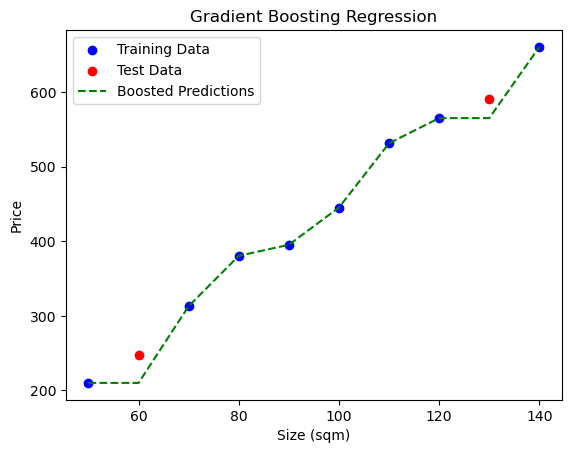

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# יצירת נתוני דוגמה (גודל בית -> מחיר)
np.random.seed(42)
sizes = np.array([50, 60, 70, 80, 90, 100, 110, 120, 130, 140])
prices = np.array([200, 250, 300, 350, 400, 450, 500, 550, 600, 650]) + np.random.normal(0, 20, 10)

# חלוקה לנתוני אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(sizes.reshape(-1, 1), prices, test_size=0.2, random_state=42)

# יצירת המודל עם מספר עצים מוגדר
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=2, random_state=42)
gb_model.fit(X_train, y_train)

# חיזוי על קבוצת הבדיקה
y_pred = gb_model.predict(X_test)

# חישוב שגיאה
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# הצגת התוצאות
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(sizes, gb_model.predict(sizes.reshape(-1, 1)), color='green', linestyle='dashed', label='Boosted Predictions')
plt.xlabel("Size (sqm)")
plt.ylabel("Price")
plt.legend()
plt.title("Gradient Boosting Regression")
plt.show()

## י **📌 סיכום** י  
י $Boosting$ היא שיטה מתקדמת בלמידת מכונה **המשפרת ביצועים בהדרגה** על ידי תיקון טעויות של מודלים קודמים. י  

📌 כאשר נדרש **דיוק גבוה**, $Boosting$ לרוב עדיף על $Bagging$ ו-$Random$ $Forests$. י  

📌י  $Boosting$ נמצא בשימוש נרחב במודלים של **$XGBoost$, $LightGBM$ ו-$CatBoost$**, שהם מהאלגוריתמים המובילים בתחרויות $ML$ כיום. י  

📌 **כיצד לבחור פרמטרים אופטימליים?** י  
- השתמש ב-$Grid$ $Search$ או $Randomized$ $Search$. י  
- התאם את קצב הלמידה כך ש-\( $\lambda$ \) לא יהיה גבוה מדי. י  
- הקפד על גודל דגימה שלא יגרום לאובדן מידע חשוב. י  

🚀 י $Boosting$ הוא **אחד הכלים החזקים ביותר** בלמידת מכונה ומוביל **במרבית תחרויות $Kaggle$**! י  
